In [1]:
import nfl_regression

## Importing the dataset

In [2]:
train_receiver_stats, train_player_stats, train_weeks = nfl_regression.preprocess_year_data('2021')
X_train, Y_train = nfl_regression.get_yards_by_stats(train_receiver_stats, train_player_stats, train_weeks, '2021')

test_receiver_stats, test_player_stats, test_weeks = nfl_regression.preprocess_year_data('2023')
X_test, Y_test = nfl_regression.get_yards_by_stats(test_receiver_stats, test_player_stats, test_weeks, '2023')

## Linear regression

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
print(f'train {reg.score(X_train, Y_train)}', f'test {reg.score(X_test, Y_test)}')

train 0.6291317999495694 test 0.41749019704042967


In [4]:
nfl_regression.find_top_select_k_best(reg, (X_train, Y_train), (X_test, Y_test))

(14, 0.4477605021820402)

In [5]:
nfl_regression.find_top_rfe(reg, (X_train, Y_train), (X_test, Y_test))

(6, 0.5368616909324463, 0.4469854067578394)

## ElasticNet

In [6]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet().fit(X_train, Y_train)
print(f'train {reg.score(X_train, Y_train)}', f'test {reg.score(X_test, Y_test)}')

train 0.6210252665376439 test 0.4521365536514519


In [7]:
nfl_regression.find_top_select_k_best(reg, (X_train, Y_train), (X_test, Y_test))

(14, 0.45759479494683963)

In [8]:
nfl_regression.find_top_rfe(reg, (X_train, Y_train), (X_test, Y_test))

(22, 0.5959995803185802, 0.46976853541927854)

## SVR

In [9]:
from sklearn.svm import SVR
reg = SVR(kernel='poly').fit(X_train, Y_train)
print(f'train {reg.score(X_train, Y_train)}', f'test {reg.score(X_test, Y_test)}')

train 0.4576698710134639 test 0.3904084925810356


In [10]:
nfl_regression.find_top_select_k_best(reg, (X_train, Y_train), (X_test, Y_test))

(15, 0.5056399353455532)

## Decision Tree Regressor

In [11]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor().fit(X_train, Y_train)
print(f'train {reg.score(X_train, Y_train)}', f'test {reg.score(X_test, Y_test)}')

train 1.0 test 0.16977601359771133


In [12]:
nfl_regression.find_top_select_k_best(reg, (X_train, Y_train), (X_test, Y_test))

(1, 0.35886817997751075)

In [13]:
nfl_regression.find_top_rfe(reg, (X_train, Y_train), (X_test, Y_test))

(1, 0.6190239209821358, 0.3335837717653666)

## Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor().fit(X_train, Y_train)
print(f'train {reg.score(X_train, Y_train)}', f'test {reg.score(X_test, Y_test)}')

train 0.9404015119949276 test 0.4963924285820318


## MLP Regressor

In [15]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(batch_size=20, solver='adam', learning_rate_init=0.0001, max_iter=1000).fit(X_train, Y_train)
print(f'train {reg.score(X_train, Y_train)}', f'test {reg.score(X_test, Y_test)}')

train 0.6196844281915314 test 0.4473829238145609


## SVR example with 15 features

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression
reg = SVR(kernel='poly')
k_best = SelectKBest(f_regression, k=15).fit(X_train, Y_train)
Xk_train, Xk_test = k_best.transform(X_train), k_best.transform(X_test)
reg = reg.fit(Xk_train, Y_train)
print(f'train {reg.score(Xk_train, Y_train)}', f'test {reg.score(Xk_test, Y_test)}')

train 0.5865293204120867 test 0.5056399353455532


In [27]:
import pandas as pd
Yk_test = pd.Series(reg.predict(Xk_test))
Yk_test.describe()

count    336.000000
mean      18.629041
std       14.397505
min       -3.243038
25%        8.386757
50%       14.637396
75%       25.520793
max       77.364786
dtype: float64

In [28]:
Y_test.describe()

count    336.000000
mean      18.165551
std       19.638690
min       -0.125000
25%        3.750000
50%       11.937500
75%       24.468750
max       99.125000
Name: weekly_yards, dtype: float64

## Analysing the distribution of outputs

<Axes: >

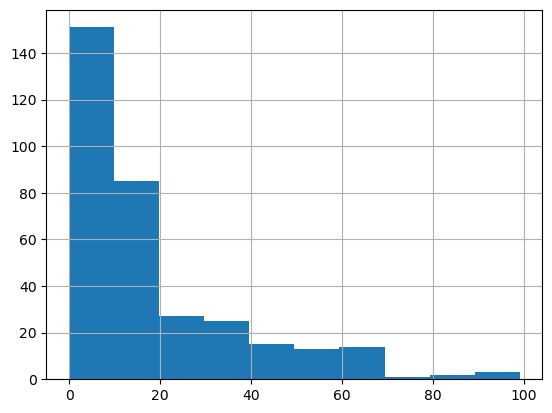

In [29]:
Y_test.hist()

<Axes: >

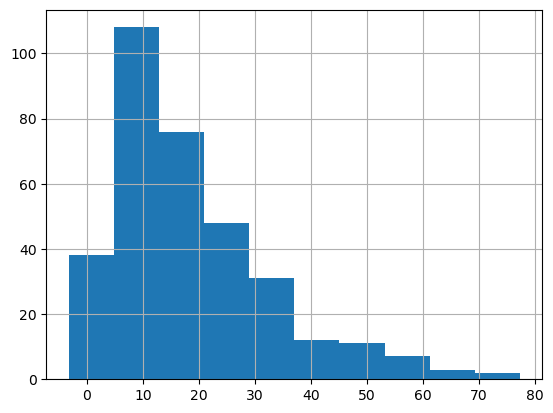

In [30]:
Yk_test.hist()

In [31]:
Y_test.skew()

1.5666145775105602

In [32]:
Yk_test.skew()

1.3859620641132089

In [34]:
Y_test.kurt()

2.174068421900038

In [35]:
Yk_test.kurt()

1.9626612127279306

## Random baseline

In [56]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor(strategy='mean')
dummy_reg = dummy_reg.fit(None, Y_train)
dummy_reg.score(None, Y_test)

-0.009325366721286699